# _**03.Monitoring Fields and Flux**_

### _**Librerias necesarias**_

In [6]:
import meep as mp
import numpy as np
import matplotlib.pyplot as plt
import os  # Importamos os para manejo de directorios

# Crear directorios necesarios si no existen
os.makedirs('docs/images', exist_ok=True)
os.makedirs('data', exist_ok=True)

### _**Parámetros de la simulación**_

In [14]:
cell = mp.Vector3(16, 8, 0)
geometry = [mp.Block(size=mp.Vector3(1e5, 1.5, 0), 
                     material=mp.Medium(epsilon=10))]

sources = [mp.Source(src=mp.GaussianSource(frequency=0.15, fwidth=0.1),
            component=mp.Ez,
            center=mp.Vector3(-7, 0),
            size=mp.Vector3(0, 4))]

pml_layers = [mp.PML(1.0)]
resolution = 20

In [15]:
sim = mp.Simulation(cell_size=cell,
                    boundary_layers=pml_layers,
                    geometry=geometry,
                    sources=sources,
                    resolution=resolution)


### _**Monitoreo de Campos con `get_array()`**_

-----------
Initializing structure...
time for choose_chunkdivision = 0.00018096 s
Working in 2D dimensions.
Computational cell is 16 x 8 x 0 with resolution 20
     block, center = (0,0,0)
          size (100000,1.5,0)
          axes (1,0,0), (0,1,0), (0,0,1)
          dielectric constant epsilon diagonal = (10,10,10)
time for set_epsilon = 0.0802372 s
-----------
run 0 finished at t = 50.0 (2000 timesteps)


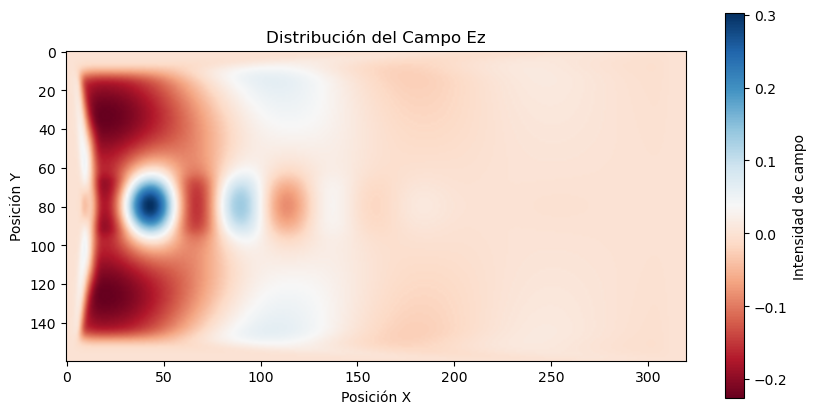

In [16]:
sim.run(until=50)

# Extraer campo Ez en todo el dominio
ez_data = sim.get_array(component=mp.Ez, 
                        vol=mp.Volume(center=mp.Vector3(), size=cell))

# Visualización básica
plt.figure(figsize=(10, 5))
plt.imshow(ez_data.T, interpolation='spline36', cmap='RdBu')
plt.colorbar(label='Intensidad de campo')
plt.title("Distribución del Campo Ez")
plt.xlabel("Posición X")
plt.ylabel("Posición Y")

# Guardar imagen en la ruta creada
plt.savefig('docs/images/ez_field_distribution.png', dpi=150, bbox_inches='tight')
plt.show()


### _**Monitores de Flujo (`FluxRegion`)**_

In [17]:
flux_region = mp.FluxRegion(center=mp.Vector3(5, 0, 0), 
                           size=mp.Vector3(0, 4, 0))

# CORRECCIÓN: Sintaxis actualizada para add_flux
trans_flux = sim.add_flux(0.15, 0, 1, flux_region)  # fcen, df, nfreq

# Ejecutar simulación extendida
sim.run(until_after_sources=100)

# Obtener resultados de flujo
flux_data = mp.get_fluxes(trans_flux)
print(f"Flujo transmitido: {flux_data[0]:.4f}")


on time step 5017 (time=125.425), 0.000797293 s/step
run 1 finished at t = 200.0 (8000 timesteps)
Flujo transmitido: 5.0985


### _**Visualizacion del flujo acumulado**_

-----------
Initializing structure...
time for choose_chunkdivision = 0.000197887 s
Working in 2D dimensions.
Computational cell is 16 x 8 x 0 with resolution 20
     block, center = (0,0,0)
          size (100000,1.5,0)
          axes (1,0,0), (0,1,0), (0,0,1)
          dielectric constant epsilon diagonal = (10,10,10)
time for set_epsilon = 0.081089 s
-----------
run 0 finished at t = 100.0 (4000 timesteps)


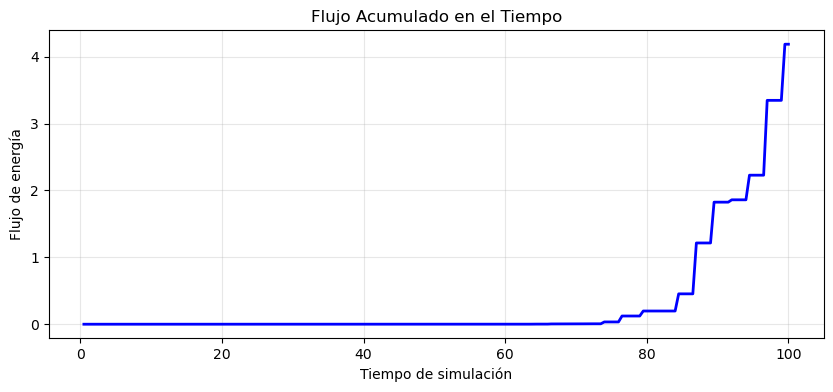

In [18]:
flux_values = []
times = []

# Función callback para capturar flujo
def capture_flux(sim):
    times.append(sim.meep_time())
    flux_values.append(mp.get_fluxes(trans_flux)[0])

# Configurar nueva simulación con callback
sim.reset_meep()
sim = mp.Simulation(cell_size=cell,
                    boundary_layers=pml_layers,
                    geometry=geometry,
                    sources=sources,
                    resolution=resolution)

# CORRECCIÓN: Sintaxis actualizada
trans_flux = sim.add_flux(0.15, 0, 1, flux_region)

# Ejecutar con captura periódica
sim.run(mp.at_every(0.5, capture_flux), until=100)

# Graficar evolución temporal
plt.figure(figsize=(10, 4))
plt.plot(times, flux_values, 'b-', linewidth=2)
plt.title("Flujo Acumulado en el Tiempo")
plt.xlabel("Tiempo de simulación")
plt.ylabel("Flujo de energía")
plt.grid(alpha=0.3)
plt.savefig('docs/images/flux_evolution.png', dpi=150, bbox_inches='tight')
plt.show()

### _**Aplicación: Resonador Óptico**_

-----------
Initializing structure...
time for choose_chunkdivision = 0.000571012 s
Working in 2D dimensions.
Computational cell is 16 x 16 x 0 with resolution 30
     cylinder, center = (0,0,0)
          radius 5, height 1e+20, axis (0, 0, 1)
          dielectric constant epsilon diagonal = (12,12,12)
     cylinder, center = (0,0,0)
          radius 3, height 1e+20, axis (0, 0, 1)
          dielectric constant epsilon diagonal = (1,1,1)
time for set_epsilon = 0.574641 s
-----------
MPB solved for frequency_1(0.33819,0,0) = 0.198916 after 16 iters
MPB solved for frequency_1(0.296304,0,0) = 0.179559 after 8 iters
MPB solved for frequency_1(0.297235,0,0) = 0.18 after 6 iters
MPB solved for frequency_1(0.297235,0,0) = 0.18 after 2 iters
Meep progress: 13.65/200.0 = 6.8% done in 4.0s, 54.7s to go
on time step 822 (time=13.7), 0.00487258 s/step
Meep progress: 27.866666666666667/200.0 = 13.9% done in 8.0s, 49.5s to go
on time step 1678 (time=27.9667), 0.00467753 s/step
Meep progress: 42.1666

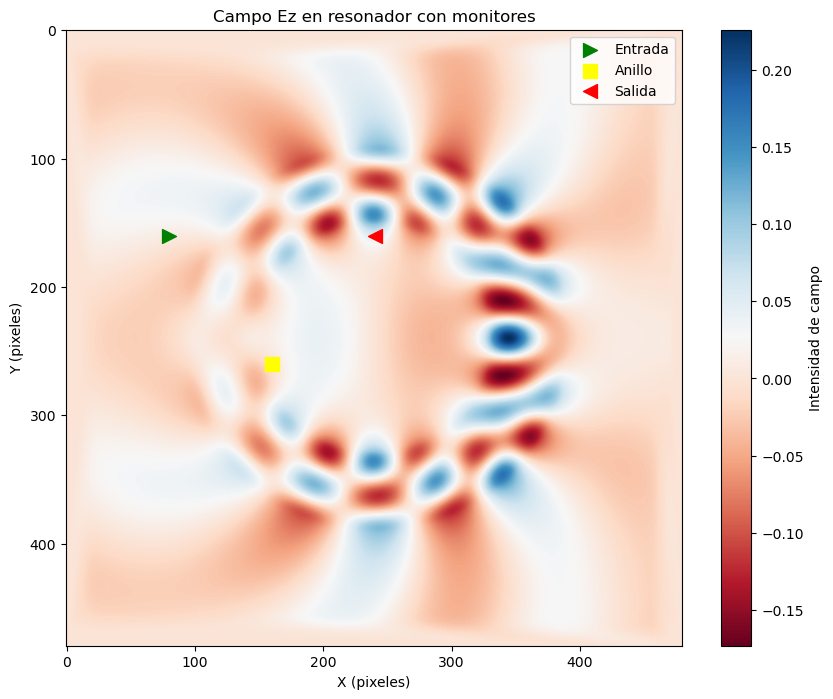

-----------
Initializing structure...
time for choose_chunkdivision = 0.00029707 s
Working in 2D dimensions.
Computational cell is 16 x 16 x 0 with resolution 30
     cylinder, center = (0,0,0)
          radius 5, height 1e+20, axis (0, 0, 1)
          dielectric constant epsilon diagonal = (12,12,12)
     cylinder, center = (0,0,0)
          radius 3, height 1e+20, axis (0, 0, 1)
          dielectric constant epsilon diagonal = (1,1,1)
time for set_epsilon = 0.585707 s
-----------
MPB solved for frequency_1(0.281825,0,0) = 0.172629 after 15 iters
MPB solved for frequency_1(0.235019,0,0) = 0.149153 after 9 iters
MPB solved for frequency_1(0.236644,0,0) = 0.149999 after 6 iters
MPB solved for frequency_1(0.236646,0,0) = 0.15 after 3 iters
MPB solved for frequency_1(0.236646,0,0) = 0.15 after 1 iters
Meep progress: 13.283333333333333/100.0 = 13.3% done in 4.0s, 26.1s to go
on time step 797 (time=13.2833), 0.00501951 s/step
Meep progress: 25.366666666666667/100.0 = 25.4% done in 8.0s, 23.

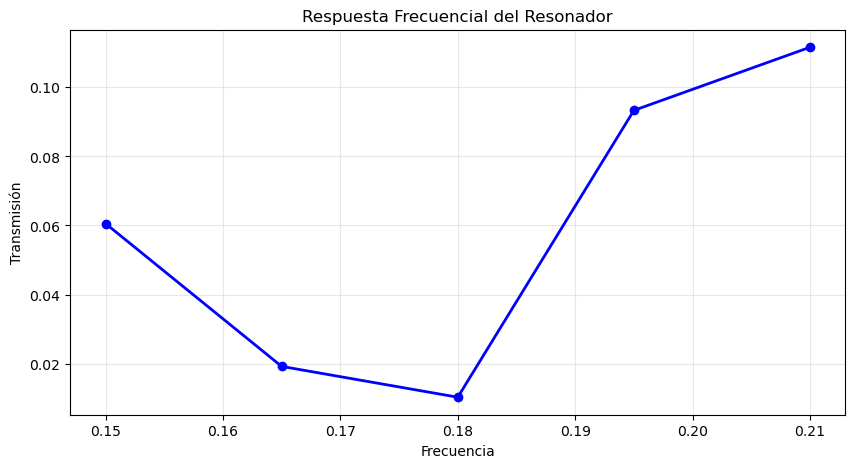

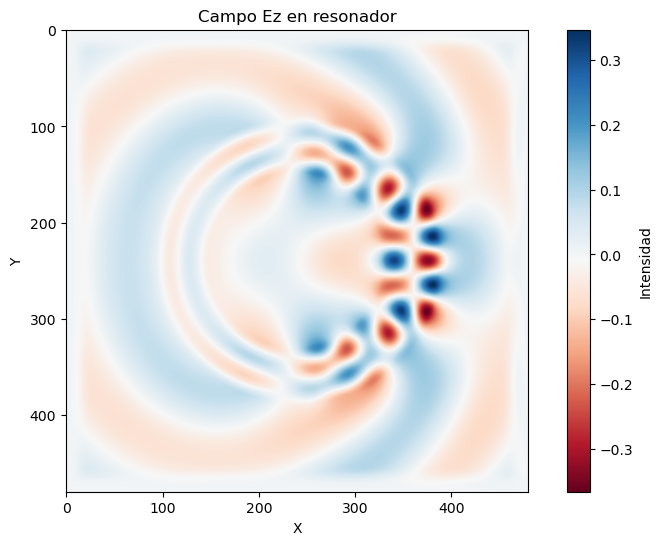

In [21]:
cell = mp.Vector3(16, 16, 0)
geometry = [
    mp.Cylinder(radius=5, material=mp.Medium(epsilon=12)),
    mp.Cylinder(radius=3, material=mp.Medium(epsilon=1))
]

# Fuente de modo propio para mejor acoplamiento
sources = [mp.EigenModeSource(src=mp.GaussianSource(0.18, fwidth=0.1),
           size=mp.Vector3(0, 3),
           center=mp.Vector3(-5, 0),
           eig_band=1,
           direction=mp.X)]

sim = mp.Simulation(cell_size=cell,
                    geometry=geometry,
                    sources=sources,
                    resolution=30,
                    boundary_layers=pml_layers)

# ### Configuración de monitores de flujo
# Vamos a colocar tres monitores de flujo:
# 1. **Monitor de entrada**: Antes del resonador
# 2. **Monitor de pérdidas**: En el resonador
# 3. **Monitor de salida**: Después del resonador

# Definir regiones de monitoreo
input_flux_region = mp.FluxRegion(center=mp.Vector3(-4, 0), size=mp.Vector3(0, 2))
ring_flux_region = mp.FluxRegion(center=mp.Vector3(0, 5), size=mp.Vector3(5, 0))  # En el anillo
output_flux_region = mp.FluxRegion(center=mp.Vector3(4, 0), size=mp.Vector3(0, 2))

# Añadir monitores de flujo
input_flux = sim.add_flux(0.18, 0, 1, input_flux_region)
ring_flux = sim.add_flux(0.18, 0, 1, ring_flux_region)
output_flux = sim.add_flux(0.18, 0, 1, output_flux_region)

# %% [markdown]
# ### Simulación y análisis de resultados
# Ejecutamos la simulación y calculamos:
# - Transmisión (T = flujo_salida / flujo_entrada)
# - Pérdidas (L = flujo_perdido / flujo_entrada)
# - Conservación de energía (T + L ≈ 1)

# %%
# Ejecutar simulación
sim.run(until=200)

# Calcular flujos
input_energy = mp.get_fluxes(input_flux)[0]
ring_energy = mp.get_fluxes(ring_flux)[0]
output_energy = mp.get_fluxes(output_flux)[0]

# Calcular métricas de rendimiento
transmission = output_energy / input_energy
losses = (input_energy - output_energy - ring_energy) / input_energy
conservation = (output_energy + ring_energy) / input_energy

print("\nResultados del resonador:")
print(f"  - Flujo de entrada: {input_energy:.4f}")
print(f"  - Flujo en el anillo: {ring_energy:.4f}")
print(f"  - Flujo de salida: {output_energy:.4f}")
print(f"  - Transmisión: {transmission:.2%}")
print(f"  - Pérdidas estimadas: {losses:.2%}")
print(f"  - Conservación de energía: {conservation:.2%}")

# %% [markdown]
# ### Visualización del campo y ubicación de monitores
# Graficamos la distribución del campo y marcamos las posiciones de los monitores de flujo

# %%
# Función mejorada para visualización
def plot_resonator_field(sim, component=mp.Ez, title="Campo en resonador", save=None):
    """Visualización del campo con ubicación de monitores de flujo"""
    plt.figure(figsize=(10, 8))
    data = sim.get_array(component=component)
    plt.imshow(data.T, cmap='RdBu', interpolation='spline36')
    plt.colorbar(label='Intensidad de campo')
    
    # Marcar posición de los monitores de flujo
    plt.scatter([-4*resolution + 16*resolution/2], [0*resolution + 16*resolution/2], 
                c='green', s=100, label='Entrada', marker='>')
    plt.scatter([0*resolution + 16*resolution/2], [5*resolution + 16*resolution/2], 
                c='yellow', s=100, label='Anillo', marker='s')
    plt.scatter([4*resolution + 16*resolution/2], [0*resolution + 16*resolution/2], 
                c='red', s=100, label='Salida', marker='<')
    
    plt.title(title)
    plt.xlabel("X (pixeles)")
    plt.ylabel("Y (pixeles)")
    plt.legend()
    if save:
        plt.savefig(f'docs/images/{save}.png', dpi=150, bbox_inches='tight')
    plt.show()

# Graficar campo con ubicación de monitores
plot_resonator_field(sim, mp.Ez, "Campo Ez en resonador con monitores", save='resonator_with_monitors')

# ### Análisis de respuesta frecuencial (Opcional avanzado)
# Podemos explorar cómo varía la transmisión con la frecuencia

# %%
# Configurar barrido de frecuencias
freqs = np.linspace(0.15, 0.21, 5)  # Rango de frecuencias
transmissions = []

for f in freqs:
    # Actualizar frecuencia de fuente
    sources[0].src = mp.GaussianSource(f, fwidth=0.1)
    
    # Reiniciar simulación
    sim.reset_meep()
    sim = mp.Simulation(cell_size=cell,
                        geometry=geometry,
                        sources=sources,
                        resolution=30,
                        boundary_layers=pml_layers)
    
    # Añadir monitores
    input_flux = sim.add_flux(f, 0, 1, input_flux_region)
    output_flux = sim.add_flux(f, 0, 1, output_flux_region)
    
    # Ejecutar simulación
    sim.run(until=100)
    
    # Calcular transmisión
    in_flux = mp.get_fluxes(input_flux)[0]
    out_flux = mp.get_fluxes(output_flux)[0]
    transmissions.append(out_flux / in_flux)
    print(f"Frecuencia: {f:.3f}, Transmisión: {transmissions[-1]:.2%}")

# Graficar respuesta frecuencial
plt.figure(figsize=(10, 5))
plt.plot(freqs, transmissions, 'bo-', linewidth=2)
plt.title("Respuesta Frecuencial del Resonador")
plt.xlabel("Frecuencia")
plt.ylabel("Transmisión")
plt.grid(alpha=0.3)
plt.savefig('docs/images/frequency_response.png', dpi=150, bbox_inches='tight')
plt.show()


# Función de utilidad para graficar
def plot_field_map(sim, component=mp.Ez, title="Campo", cmap='RdBu', save=None):
    """Visualización optimizada de campos"""
    plt.figure(figsize=(10, 6))
    data = sim.get_array(component=component)
    plt.imshow(data.T, cmap=cmap, interpolation='spline36')
    plt.colorbar(label='Intensidad')
    plt.title(title)
    plt.xlabel("X")
    plt.ylabel("Y")
    if save:
        plt.savefig(f'docs/images/{save}.png', dpi=150, bbox_inches='tight')
    plt.show()

# Ejemplo de uso:
plot_field_map(sim, mp.Ez, "Campo Ez en resonador", save='resonator_field_detail')